______________________________________
# UBER FARE PRICE PREDICTION USING ML
___________________________________________________________________________

# Dataset Description:

The project is about on world's largest taxi company Uber inc. In this project, we're looking to predict the fare for their future transactional cases. Uber delivers service to lakhs of customers daily. Now it becomes really important to manage their data properly to come up with new business ideas to get best results. Eventually, it becomes really important to estimate the fare prices accurately.

-- The datset contains the following fields:

* key - a unique identifier for each trip
* fare_amount - the cost of each trip in usd
* pickup_datetime - date and time when the meter was engaged
* passenger_count - the number of passengers in the vehicle (driver entered value)
* pickup_longitude - the longitude where the meter was engaged
* pickup_latitude - the latitude where the meter was engaged
* dropoff_longitude - the longitude where the meter was disengaged
* dropoff_latitude - the latitude where the meter was disengaged

Acknowledgement:
The dataset is referred from Kaggle.

Objective:
Understand the Dataset & cleanup (if required).
Build Regression models to predict the fare price of uber ride.
Also evaluate the models & compare thier respective scores like R2, RMSE, etc.

### Importing Necessary  Libraries

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import DistanceMetric
from math import radians
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
import statsmodels.api as sm
import scipy.stats as sc
from warnings import filterwarnings
sns.set_style('whitegrid')
plt.style.use('ggplot')
filterwarnings('ignore')
plt.rcParams['figure.figsize']=[15,8]

# Load Data

### Data Source:
https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

In [2]:
df = pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [6]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


### Dataset Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


* the Data Set Consists  200000 rows and 9 columns.
* fare_amount is the Target Variable.
* Dataset Consists  of numerical and categorical variables:
- Numerical Variables:
    - pickup_datetime
    - pickup_latitude
    - pickup_longitude
    - dropoff_latitude
    - dropoff_longitude
- Categorical Variables:
    - passanger_count

### Check for Null Values

In [8]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

* There are only  2 columns with 2 missing values

In [9]:
# Create a Copy of the Orginal Dataset
df1 = df.copy()

In [10]:
df1.nunique()

Unnamed: 0           200000
key                  200000
fare_amount            1244
pickup_datetime      196629
pickup_longitude      71066
pickup_latitude       83835
dropoff_longitude     76894
dropoff_latitude      90585
passenger_count           8
dtype: int64

In [11]:
# lets Drop the Insignificant  columns 'Unnamed: 0' and 'key' as well as Missing values rows

df1 = df1.drop(['Unnamed: 0','key'],axis=1)
df1.dropna(axis=0,inplace=True)

#  Data Analysis (EDA) and Data Pre-processing

In [12]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
fare_amount,199999.0,11.359892,9.901760,-52.000000,6.000000,8.500000,12.500000,499.000000
pickup_longitude,199999.0,-72.527631,11.437815,-1340.648410,-73.992065,-73.981823,-73.967154,57.418457
pickup_latitude,199999.0,39.935881,7.720558,-74.015515,40.734796,40.752592,40.767158,1644.421482
dropoff_longitude,199999.0,-72.525292,13.117408,-3356.666300,-73.991407,-73.980093,-73.963658,1153.572603
dropoff_latitude,199999.0,39.923890,6.794829,-881.985513,40.733823,40.753042,40.768001,872.697628
passenger_count,199999.0,1.684543,1.385995,0.000000,1.000000,1.000000,2.000000,208.000000


* The avg fare amount is 11.3$  ,and min = -52, max = 499$ this might Indicate Presence of Outliers in the Dataset 
* Passanger count max is 208, which is also not possible. Max to be set at 5

-- By Observing the Values present in these Columns it Clearly Indicates presence of Outliers and Correlation

### Correlation matrix

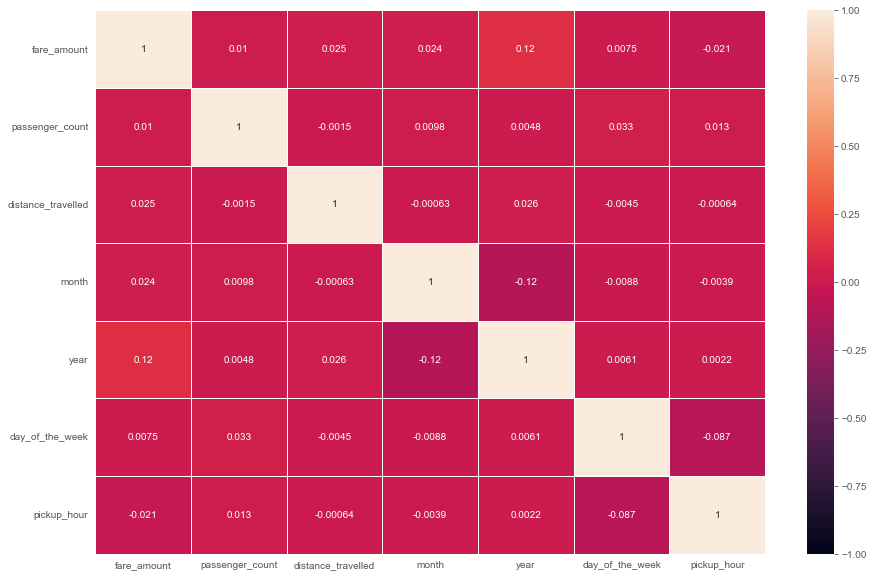

In [46]:
# to Identify Correlated Values 
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(), annot=True, linewidths=.5, vmin = -1, vmax = 1, fmt = '.2g')
plt.show()

High correlation can be observed between the geo-spatial data points, which was expected. Therefore, there is no need to drop any of the independent variables

### Lets Calculate  Haversine distance
*meaninig* : The Haversine (or great circle) distance is the angular distance between two points on the surface of a sphere. The first coordinate of each point is assumed to be the latitude, the second is the longitude, given in radians.

In [14]:
from math import *
# or
# sklearn.metrics.pairwise.haversine_distances

In [15]:
# Define formula to calculate haversine distance
def distance(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        travel_dist.append(c)
       
    return travel_dist

In [18]:
# Calculate for each row and add distance in km as a new column
df1['distance_travelled'] = distance(df1['pickup_longitude'].to_numpy(),
                                                df1['pickup_latitude'].to_numpy(),
                                                df1['dropoff_longitude'].to_numpy(),
                                                df1['dropoff_latitude'].to_numpy()
                                              )

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fare_amount         199999 non-null  float64
 1   pickup_datetime     199999 non-null  object 
 2   pickup_longitude    199999 non-null  float64
 3   pickup_latitude     199999 non-null  float64
 4   dropoff_longitude   199999 non-null  float64
 5   dropoff_latitude    199999 non-null  float64
 6   passenger_count     199999 non-null  int64  
 7   distance_travelled  199999 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 13.7+ MB


In [20]:
# As we can see, pickup_datetime is being read as an object data type. However, we need to convert it into datetime data type
df1['pickup_datetime']  = pd.to_datetime(df1['pickup_datetime'])

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   fare_amount         199999 non-null  float64            
 1   pickup_datetime     199999 non-null  datetime64[ns, UTC]
 2   pickup_longitude    199999 non-null  float64            
 3   pickup_latitude     199999 non-null  float64            
 4   dropoff_longitude   199999 non-null  float64            
 5   dropoff_latitude    199999 non-null  float64            
 6   passenger_count     199999 non-null  int64              
 7   distance_travelled  199999 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1)
memory usage: 13.7 MB


In [22]:
# From pickup_datetime extract date, month, year, weekday and dayname
from datetime import datetime

df1['date'] = pd.to_datetime(df1['pickup_datetime']).dt.date
df1['month'] = pd.to_datetime(df1['pickup_datetime']).dt.month
df1['year'] = pd.to_datetime(df1['pickup_datetime']).dt.year
df1['day_of_the_week'] = pd.to_datetime(df1['pickup_datetime']).dt.weekday
df1['day_name'] = pd.to_datetime(df1['pickup_datetime']).dt.day_name()
df1['pickup_time'] = pd.to_datetime(df1['pickup_datetime']).dt.time
df1['pickup_hour'] = pd.to_datetime(df1['pickup_datetime']).dt.hour

In [ ]:
data.info()

### Outlier Treatment

The following treatment is being done to outliers:
- passanger_count should be less than 5
- rows with passanger_count = 0 should be dropped
- fare_amount should be kept to the minimum set by Uber, i.e., $2.5
- distance should be maximum 130 km
- distance travelled cannot be zero. Rows with distance = 0 must be dropped

In [ ]:
data.drop(data[data['passenger_count'] > 5].index, axis=0, inplace = True)
data.drop(data[data['passenger_count'] == 0].index, axis=0, inplace = True)
data.drop(data[data['fare_amount'] < 2.5].index, axis=0, inplace = True)
data.drop(data[data['distance_travelled'] > 130].index, axis=0, inplace = True)
data.drop(data[data['distance_travelled'] == 0].index, axis=0, inplace = True)
data.dropna(axis=0,inplace=True)

In [23]:
df1.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_travelled,date,month,year,day_of_the_week,day_name,pickup_time,pickup_hour
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,2015-05-07,5,2015,3,Thursday,19:52:06,19
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,2009-07-17,7,2009,4,Friday,20:04:56,20
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,2009-08-24,8,2009,0,Monday,21:45:00,21
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,2009-06-26,6,2009,4,Friday,08:22:21,8
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,2014-08-28,8,2014,3,Thursday,17:47:00,17


In [24]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
fare_amount,199999.0,11.359892,9.901760,-52.000000,6.000000,8.500000,12.500000,499.000000
pickup_longitude,199999.0,-72.527631,11.437815,-1340.648410,-73.992065,-73.981823,-73.967154,57.418457
pickup_latitude,199999.0,39.935881,7.720558,-74.015515,40.734796,40.752592,40.767158,1644.421482
dropoff_longitude,199999.0,-72.525292,13.117408,-3356.666300,-73.991407,-73.980093,-73.963658,1153.572603
dropoff_latitude,199999.0,39.923890,6.794829,-881.985513,40.733823,40.753042,40.768001,872.697628
passenger_count,199999.0,1.684543,1.385995,0.000000,1.000000,1.000000,2.000000,208.000000
distance_travelled,199999.0,20.855350,382.964642,0.000000,1.215222,2.120992,3.875169,16409.239135
month,199999.0,6.281791,3.438933,1.000000,3.000000,6.000000,9.000000,12.000000
year,199999.0,2011.742434,1.856400,2009.000000,2010.000000,2012.000000,2013.000000,2015.000000
day_of_the_week,199999.0,3.048435,1.946946,0.000000,1.000000,3.000000,5.000000,6.000000


In [25]:
# Dropping the columns 'pickup datetime' and 'pickup hour' as we have extracted relvant pieces of information
# from these columns and do not need these columns for our analysis now. Also, 'date' and 'day_name', month and yuear
# as well as pickup and dropoff coordinates are not required as we have the required data extracted from them

df1 = df1.drop(['pickup_datetime','pickup_time', 'date', 'pickup_longitude', 'pickup_latitude',
                  'dropoff_longitude', 'dropoff_latitude', 'day_name'],axis=1)

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fare_amount         199999 non-null  float64
 1   passenger_count     199999 non-null  int64  
 2   distance_travelled  199999 non-null  float64
 3   month               199999 non-null  int64  
 4   year                199999 non-null  int64  
 5   day_of_the_week     199999 non-null  int64  
 6   pickup_hour         199999 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 12.2 MB


# Numerical Features - Univariate Analysis

## Boxplot & Histogram

### Distance

In [129]:
df1.head()

,fare_amount,passenger_count,distance_travelled,month,year,day_of_the_week,pickup_hour
0,7.5,1,1.683323,5,2015,3,19
1,7.7,1,2.457590,7,2009,4,20
2,12.9,1,5.036377,8,2009,0,21
3,5.3,3,1.661683,6,2009,4,8
4,16.0,5,4.475450,8,2014,3,17


<AxesSubplot:xlabel='distance_travelled'>

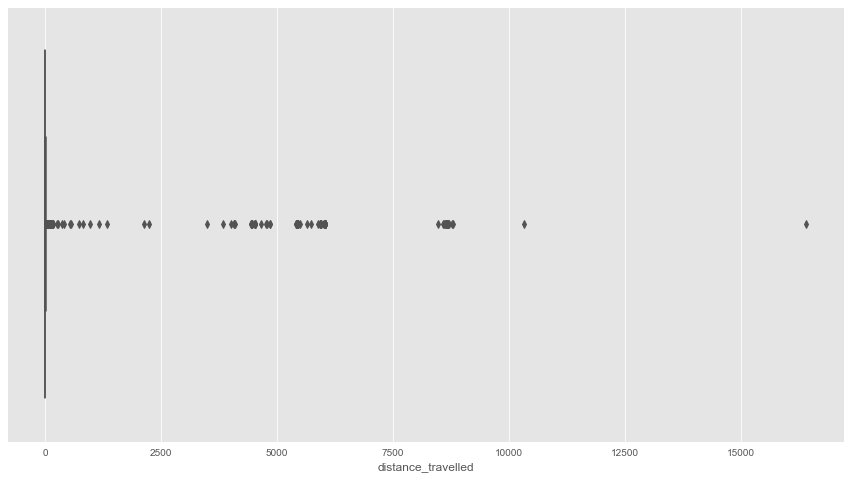

In [47]:
sns.boxplot(x=df1['distance_travelled'])

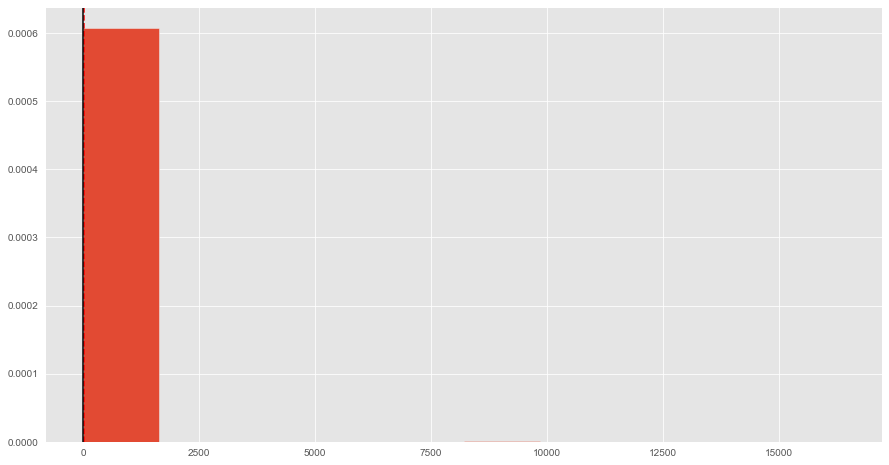

In [48]:
hist = plt.hist(x=df1['distance_travelled'], density = True)
plt.axvline(df1['distance_travelled'].mean(), color = 'red', linestyle='--')
plt.axvline(df1['distance_travelled'].median(), color = 'black', linestyle='-')
plt.show()

Observations:
- Negatively Skewed
- Outliers on the left end
- Mean and Median are close

# Categorical Features - Univariate Analysis

### Passenger Count

In [34]:
df1['passenger_count'].value_counts(normalize = True)

1      0.692128
2      0.147141
5      0.070045
3      0.044405
4      0.021380
6      0.021355
0      0.003540
208    0.000005
Name: passenger_count, dtype: float64

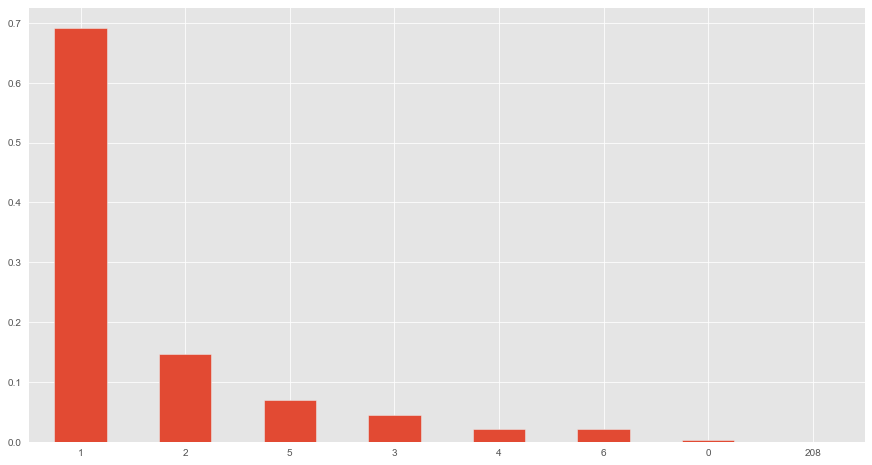

In [49]:
df1['passenger_count'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)
plt.show()

Observation:
- Almost 70% of trips had only 1 passanger

### Day of the week

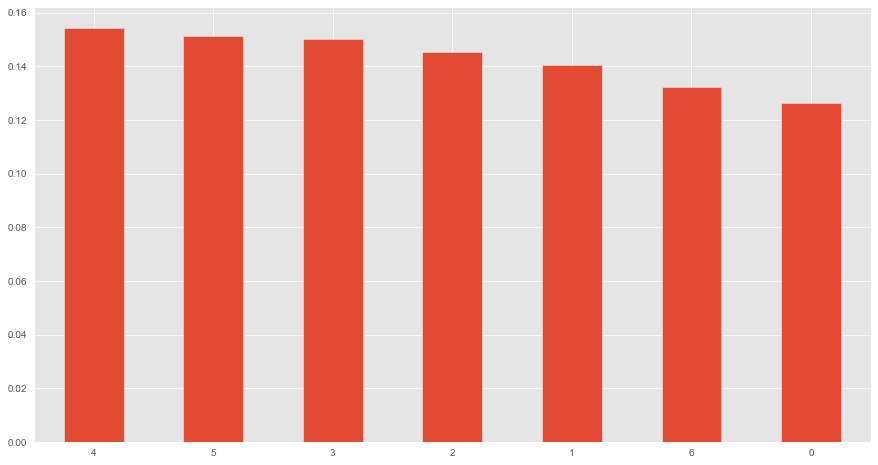

In [50]:
df1['day_of_the_week'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)
plt.show()

Observation:
- As expected weekend eve is, Friday and Saturday had the highest number of trips

### Pickup Time

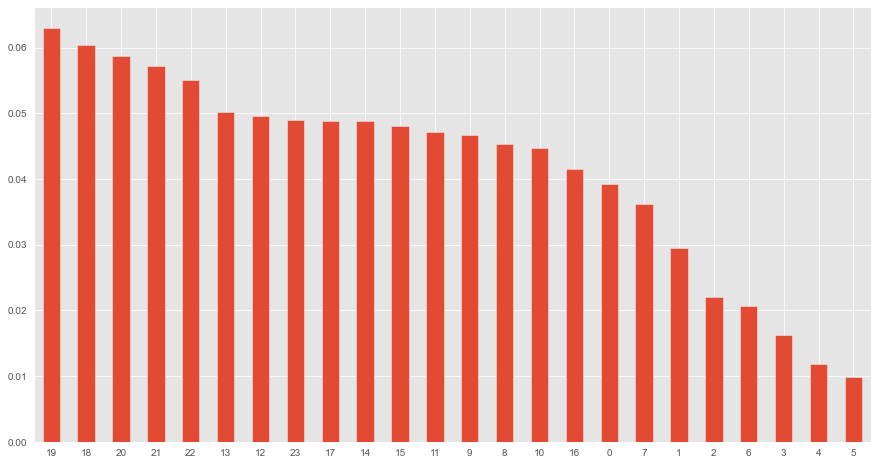

In [51]:
df1['pickup_hour'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)
plt.show()

Observation:
- As expected, the number of trips are low during 1am - 5am, and peak between 7pm - 9pm

We can clearly see that during weekdays, peak hours are during the day while on weekends, peak hours are late in the night

# Bivariate / Multivariate Analysis

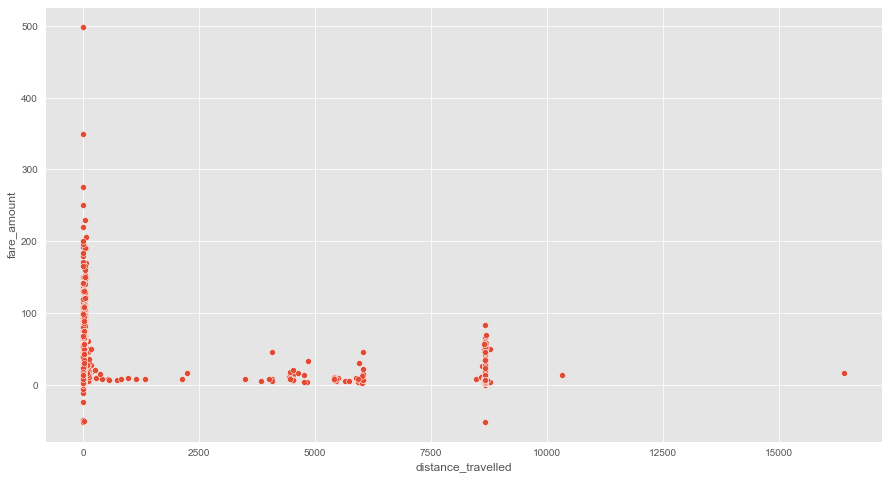

In [53]:
#Scatte plot of distance vs fare amount
sns.scatterplot(x = df1.distance_travelled, y = df1.fare_amount)
plt.show()

Generally, as distance increases, the fare amount also increases with a few sporadic inconsistencies

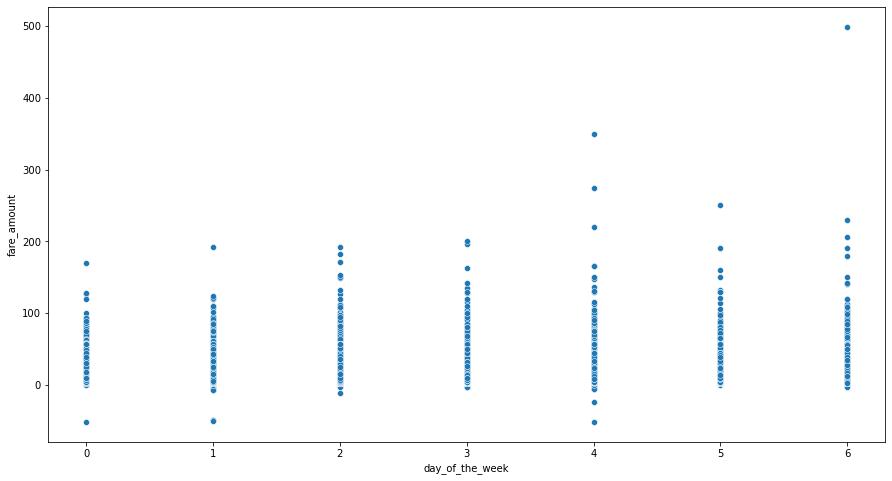

In [42]:
#Scatter plot of day of the week vs fare amount
sns.scatterplot(x = df1.day_of_the_week, y = df1.fare_amount)
plt.show()

Generally speaking, weekend fares are higher than weekday fares. This could be due to distance travelled or due to peak hours

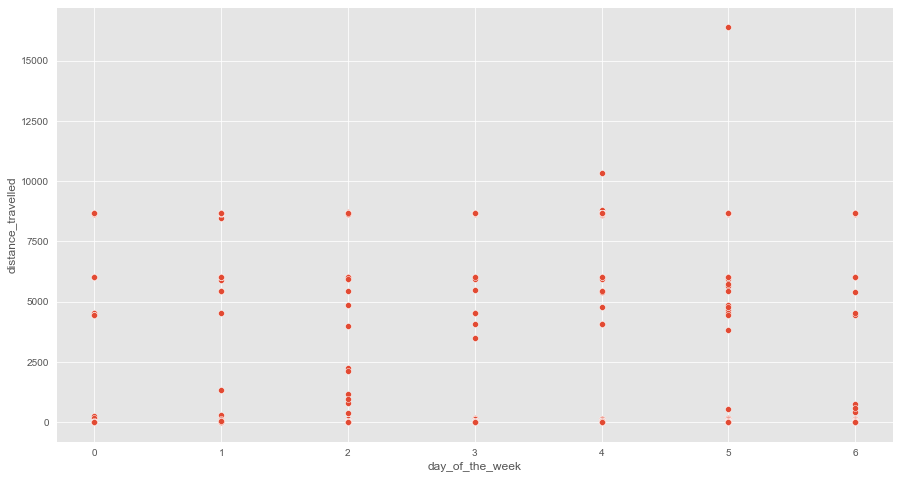

In [54]:
#Scatte plot of day of the week vs distance to see if there is any relationship between them
sns.scatterplot(x = df1.day_of_the_week, y = df1.distance_travelled)
plt.show()

We see that there isn;t much of a relationship between distance travelled vs fay of the week - thus, it is appears that fare amount being higher on weekends has a high likelihood of being linked to peak hours / wait time due to higher traffic.

Unfortunately, we do not have the dropoff time for each ride to be able to ascertain the time of each trip and demonstrate if we can see a relationship between fare and time travelled

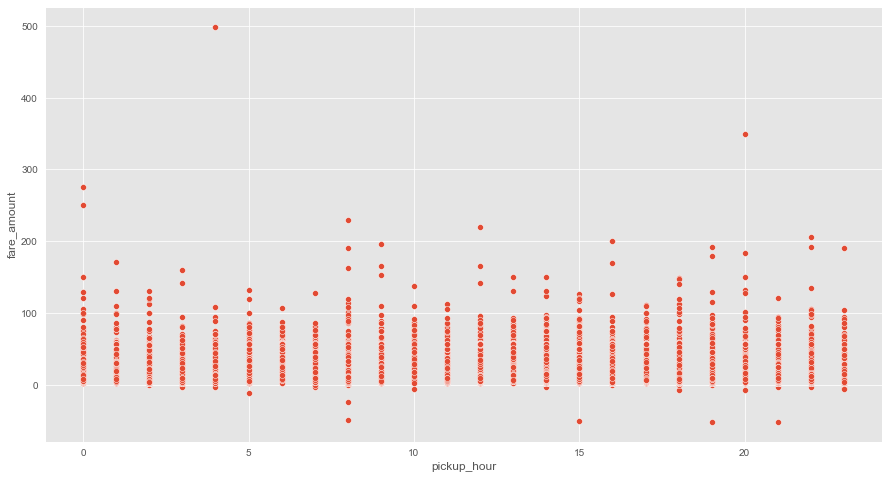

In [55]:
#Scatter plot of pickup time vs fare amount
sns.scatterplot(x = df1.pickup_hour, y = df1.fare_amount)
plt.show()

We do see some pickup times having a greater % of higher fares as compared to others - however, it is difficult to draw a concluding relationship

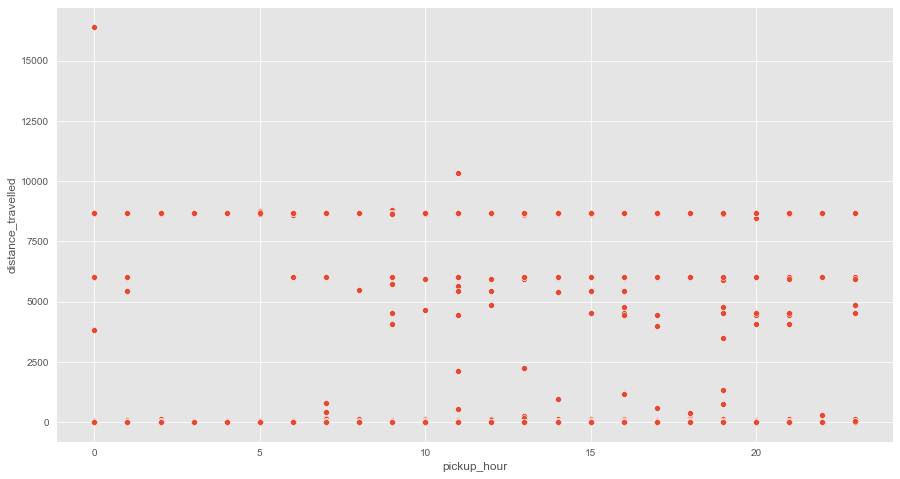

In [56]:
#Scatter plot of pickup time vs distance
sns.scatterplot(x = df1.pickup_hour, y = df1.distance_travelled)
plt.show()

Some pickup hours have a greater concentration of trips where a high distance was travelled as compared to others

### Data Preparatrion

### Feature Scaling

Feature Scaling is required because of two reasons:
1. The data points are far from each other. This means that in some columns, the distance between data points is a lot
2. Some of the features have a unit while other features are unitless. Thereofre, it is important to make all features unitless

In [57]:
ss = StandardScaler()

In [58]:
x = df1.drop(['fare_amount'], axis = 1)
y = df1['fare_amount'].values.reshape(-1, 1)

In [59]:
y_std = ss.fit_transform(y)

x_std = ss.fit_transform(x)

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x_std, y_std, test_size = 0.3, random_state = 42)

In [61]:
x_train.shape

(139999, 6)

In [62]:
y_train.shape

(139999, 1)

In [63]:
x_test.shape

(60000, 6)

In [64]:
y_test.shape

(60000, 1)

# Regression Models

## Linear Regression

In [65]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [66]:
LR_pred = LR.predict(x_test)

In [67]:
print("Training set score: {:.2f}".format(LR.score(x_train, y_train)))
print("Test set score: {:.7f}".format(LR.score(x_test, y_test)))

Training set score: 0.02
Test set score: 0.0155342


In [69]:
from sklearn import metrics
MAE_LR= metrics.mean_absolute_error(y_test, LR_pred)
MSE_LR= metrics.mean_squared_error(y_test, LR_pred)
RMSE_LR= (metrics.mean_squared_error(y_test, LR_pred,squared=False))
r2_LR=r2_score(y_test, LR_pred)
Adj_r2_LR=1-(1-r2_score(y_test, LR_pred))*((len(x_test)-1)/(len(x_test)-len(x_test[0])-1))

In [70]:
print('Mean absolute error of linear regression',MAE_LR)
print('Mean square  error of linear regression',MSE_LR)
print('root Mean square error of linear regression',RMSE_LR)
print('r2 score of linear regression',r2_LR)
print('adjusted r2 of linear regression',Adj_r2_LR)

Mean absolute error of linear regression 0.602827691501411
Mean square  error of linear regression 1.0325370010111947
root Mean square error of linear regression 1.0161382784892983
r2 score of linear regression 0.015534163567349601
adjusted r2 of linear regression 0.015435705496931518


In [ ]:
# The Above Score Better

### Decision Tree Regressor

In [71]:
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)

DecisionTreeRegressor()

In [72]:
DTpreds = DT.predict(x_test)

In [73]:
print("Training set score: {:.2f}".format(DT.score(x_train, y_train)))
print("Test set score: {:.7f}".format(DT.score(x_test, y_test)))

Training set score: 1.00
Test set score: 0.4434833


In [74]:
MAE_DT= metrics.mean_absolute_error(y_test, DTpreds)
MSE_DT= metrics.mean_squared_error(y_test, DTpreds)
RMSE_DT= np.sqrt(metrics.mean_squared_error(y_test, DTpreds))
r2_DT=r2_score(y_test, DTpreds)
Adj_r2_DT=1-(1-r2_score(y_test, DTpreds))*((len(x_test)-1)/(len(x_test)-len(x_test[0])-1))

In [75]:
print('Mean absolute error of decision tree',MAE_DT)
print('Mean square  error of decision tree',MSE_DT)
print('root Mean square error of decision tree',RMSE_DT)
print('r2 score of decision tree',r2_DT)
print('adjusted r2 of decision tree',Adj_r2_DT)

Mean absolute error of decision tree 0.32879292002181676
Mean square  error of decision tree 0.5836912572822076
root Mean square error of decision tree 0.7639968961207942
r2 score of decision tree 0.4434832831598218
adjusted r2 of decision tree 0.44342762499468524


### Random Forest regressor

In [76]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(x_train, y_train)

RandomForestRegressor()

In [77]:
RFpreds = RF.predict(x_test)

In [78]:
print("Training set score: {:.2f}".format(RF.score(x_train, y_train)))
print("Test set score: {:.7f}".format(RF.score(x_test, y_test)))

Training set score: 0.96
Test set score: 0.6779608


In [79]:
MAE_RF= metrics.mean_absolute_error(y_test, RFpreds)
MSE_RF= metrics.mean_squared_error(y_test, RFpreds)
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test, RFpreds))
r2_RF=r2_score(y_test, RFpreds)
Adj_r2_RF=1-(1-r2_score(y_test, RFpreds))*((len(x_test)-1)/(len(x_test)-len(x_test[0])-1))

In [80]:
print('Mean absolute error of random forest',MAE_RF)
print('Mean square  error of random forest',MSE_RF)
print('root Mean square error of random forest',RMSE_RF)
print('r2 score of random forest',r2_RF)
print('adjusted r2 of random forest',Adj_r2_RF)

Mean absolute error of random forest 0.24230291963294112
Mean square  error of random forest 0.3377643208442173
root Mean square error of random forest 0.5811749485690323
r2 score of random forest 0.6779607565526813
adjusted r2 of random forest 0.6779285488707737


# Boosting Regressors

In [81]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

## Gradient Boosting

In [82]:
gbr = GradientBoostingRegressor(random_state = 42)
gbr.fit(x_train, y_train)
predictions_gbr = gbr.predict(x_test)

In [83]:
print("Training set score: {:.2f}".format(gbr.score(x_train, y_train)))
print("Test set score: {:.7f}".format(gbr.score(x_test, y_test)))

Training set score: 0.78
Test set score: 0.6991512


In [84]:
MAE_GBR= metrics.mean_absolute_error(y_test, predictions_gbr)
MSE_GBR= metrics.mean_squared_error(y_test, predictions_gbr)
RMSE_GBR= np.sqrt(metrics.mean_squared_error(y_test, predictions_gbr))
r2_GBR=r2_score(y_test, predictions_gbr)
Adj_r2_GBR=1-(1-r2_score(y_test, predictions_gbr))*((len(x_test)-1)/(len(x_test)-len(x_test[0])-1))

In [85]:
print('Mean absolute error of gradient boosting regressor',MAE_GBR)
print('Mean square  error of gradient boosting regressor',MSE_GBR)
print('root Mean square error of gradient boosting regressor',RMSE_GBR)
print('r2 score of gradient boosting regressor',r2_GBR)
print('adjusted r2 of gradient boosting regressor',Adj_r2_GBR)

Mean absolute error of gradient boosting regressor 0.22606828877205767
Mean square  error of gradient boosting regressor 0.31553914953415585
root Mean square error of gradient boosting regressor 0.5617287152479886
r2 score of gradient boosting regressor 0.6991512047808717
adjusted r2 of gradient boosting regressor 0.6991211163910376


## XGBoost Regressor

In [86]:
from xgboost import XGBRegressor

In [87]:
xgb = XGBRegressor(random_state = 42, scale_pos_weight = 1)
xgb.fit(x_train, y_train)
predictions_xgb = xgb.predict(x_test)

In [88]:
print("Training set score: {:.2f}".format(xgb.score(x_train, y_train)))
print("Test set score: {:.7f}".format(xgb.score(x_test, y_test)))

Training set score: 0.84
Test set score: 0.6931478


In [89]:
MAE_XGB= metrics.mean_absolute_error(y_test, predictions_xgb)
MSE_XGB= metrics.mean_squared_error(y_test, predictions_xgb)
RMSE_XGB= np.sqrt(metrics.mean_squared_error(y_test, predictions_xgb))
r2_XGB=r2_score(y_test, predictions_xgb)
Adj_r2_XGB=1-(1-r2_score(y_test, predictions_xgb))*((len(x_test)-1)/(len(x_test)-len(x_test[0])-1))

In [90]:
print('Mean absolute error of XGB regressor',MAE_XGB)
print('Mean square  error of XGB regressor',MSE_XGB)
print('root Mean square error of XGB regressor',RMSE_XGB)
print('r2 score of XGB regressor',r2_XGB)
print('adjusted r2 of XGB regressor',Adj_r2_XGB)

Mean absolute error of XGB regressor 0.2249474585441764
Mean square  error of XGB regressor 0.3218357144211558
root Mean square error of XGB regressor 0.5673056622502157
r2 score of XGB regressor 0.6931477850370152
adjusted r2 of XGB regressor 0.6931170962351587


**Generally for a Regression we Usually Prefer Root Mean Squared Error as a Performance Measurement Technique
The Lower the Better**

# Choosing the best models

In [109]:
cols = ['Model', 'MSE', 'RMSE', 'R2_score','MAE','ADJ_r']
result_table = pd.DataFrame(columns = cols)

In [110]:
full_metrics = pd.Series({'Model': "Linear Regression", 'MSE': MSE_LR, 'RMSE' : RMSE_LR, 'R2_score' : r2_LR,'MAE':MAE_LR,'ADJ_r':Adj_r2_LR})

In [111]:
result_table = result_table.append(full_metrics, ignore_index = True)

In [112]:
full_metrics = pd.Series({'Model': "Decision Tree", 'MSE': MSE_DT, 'RMSE' : RMSE_DT, 'R2_score' : r2_DT,'MAE':MAE_DT,'ADJ_r':Adj_r2_DT})

In [113]:
result_table = result_table.append(full_metrics, ignore_index = True)

In [114]:
full_metrics = pd.Series({'Model': "Random Forest", 'MSE': MSE_RF, 'RMSE' : RMSE_RF, 'R2_score' : r2_RF,'MAE':MAE_RF,'ADJ_r':Adj_r2_RF})

In [115]:
result_table = result_table.append(full_metrics, ignore_index = True)

In [116]:
full_metrics = pd.Series({'Model': "Gradient Boosting", 'MSE': MSE_GBR, 'RMSE' : RMSE_GBR, 'R2_score' : r2_GBR,'MAE':MAE_GBR,'ADJ_r':Adj_r2_GBR})

In [117]:
result_table = result_table.append(full_metrics, ignore_index = True)

In [118]:
full_metrics = pd.Series({'Model': "XGBoost", 'MSE': MSE_XGB, 'RMSE' : RMSE_XGB, 'R2_score' : r2_XGB,'MAE':MAE_XGB,'ADJ_r':Adj_r2_XGB})

In [119]:
result_table = result_table.append(full_metrics, ignore_index = True)

In [120]:
result_table

,Model,MSE,RMSE,R2_score,MAE,ADJ_r
0,Linear Regression,1.032537,1.016138,0.015534,0.602828,0.015436
1,Decision Tree,0.583691,0.763997,0.443483,0.328793,0.443428
2,Random Forest,0.337764,0.581175,0.677961,0.242303,0.677929
3,Gradient Boosting,0.315539,0.561729,0.699151,0.226068,0.699121
4,XGBoost,0.321836,0.567306,0.693148,0.224947,0.693117


**Based on the above,overall Random Forest produces the best results out of all tested models. However, hyperparameter tuning could help improve the results,even Gradient boostting regressor and XGBregressor are performing better.**

### Hyperparameter Tuning

In [121]:
rf_regressor = RandomForestRegressor()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}
random_search = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)
random_search.fit(x_train, y_train)
best_params = random_search.best_params_
best_model = random_search.best_estimator_


y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)


print("Best Parameters: ", best_params)








Mean Squared Error:  0.314971620985544
Best Parameters:  {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10}


In [122]:
RF = RandomForestRegressor(n_estimators=200, min_samples_split=10,min_samples_leaf=2,max_depth=10)
RF.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=200)

In [123]:
print("Training set score: {:.2f}".format(RF.score(x_train, y_train)))
print("Test set score: {:.7f}".format(RF.score(x_test, y_test)))

Training set score: 0.81
Test set score: 0.7000702


In [124]:
MAE_XGB= metrics.mean_absolute_error(y_test, predictions_xgb)
MSE_XGB= metrics.mean_squared_error(y_test, predictions_xgb)
RMSE_XGB= np.sqrt(metrics.mean_squared_error(y_test, predictions_xgb))
r2_XGB=r2_score(y_test, predictions_xgb)
Adj_r2_XGB=1-(1-r2_score(y_test, predictions_xgb))*((len(x_test)-1)/(len(x_test)-len(x_test[0])-1))

In [125]:
print('Mean absolute error of random forest',MAE_RF)
print('Mean square  error of random forest',MSE_RF)
print('root Mean square error of random forest',RMSE_RF)
print('r2 score of random forest',r2_RF)
print('adjusted r2 of random forest',Adj_r2_RF)

Mean absolute error of random forest 0.24230291963294112
Mean square  error of random forest 0.3377643208442173
root Mean square error of random forest 0.5811749485690323
r2 score of random forest 0.6779607565526813
adjusted r2 of random forest 0.6779285488707737


After Tuning there are some Minute Changes to be Observed

_____________________________

# THANKYOU

________________________________________